#### **This notebook combines the features for user.**

In [1]:
import pandas as pd
import numpy as np
import warnings

import importlib

#### packages
import helper.strategy_helper as st_hp
import helper.visualization as vz_hp
import config.config as config_hp

import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [2]:
#we could train a RF model and check the stratified CV score, but the 
# SRF has its restrictions with imbalanced classes because
# it uses a bootstrap sample of the training set to form each tree.

#### **Load data**

In [3]:
all_feature = './../data/RQ3_replier_classifier_features.csv'

df_stat = pd.read_csv(all_feature)

In [5]:
# len(df_stat)

#### **Balanced sample test**

In [17]:
import helper.stat_helper as stat_hp
importlib.reload(stat_hp)

def test_balanced(df_stat, filename=None):
    df_0 = df_stat.loc[df_stat['replier_label'] == 0]
    df_1 = df_stat.loc[df_stat['replier_label'] == 1]
    
    all_cv_scores = []
    for i in range(0,10):
        df_sample = df_0.sample(len(df_1), random_state=i)

        df_0 = df_0.loc[~df_0['replier_userid'].isin(
            df_sample['replier_userid']
        )]

        df_all = pd.concat([df_sample,
                            df_1
                           ])

        cv_results_tuned_model = \
    stat_hp.run_model_with_best_threshold(df_sample,
                                          columns_not_include=columns_not_include,
                                          model_type='random', 
                                          y_column = 'replier_label',
                                          filename=None,
                                         )
    cv_results_tuned_model['total_data'] = total_len
    cv_results_tuned_model['reply_threshold'] = i

        all_cv_scores.append([final_score['mean_precision'], 
                              final_score['mean_recall'],
                              final_score['mean_f1'],
                              final_score['mean_auc'],
                              i
                             ])
        
    (pd.DataFrame(data=all_cv_scores,
                 columns=['mean_precision',
                          'mean_recall',
                          'mean_f1',
                          'mean_auc',
                          'index'
                         ]
                 )
    ).to_pickle(filename)

In [18]:
filename ='./../results/replier_model_different_datasize_1_50.pkl.gz'
test_balanced(df_stat, filename=filename)


 **** random ****
[0 1]
Xtrain:  11195
Xtrain shape:  (11195, 76)
Xtest:  2799
Ytrain:  11195
Ytest:  2799
Running Random Forest
Cross validation: mean 0.89 f1 with a standard deviation of 0.11
Cross validation: mean 0.92 precision with a standard deviation of 0.03
Cross validation: mean 0.87 recall with a standard deviation of 0.16
Cross validation: mean 0.97 auc with standard deviation of 0.03

 **** random ****
[0 1]
Xtrain:  11195
Xtrain shape:  (11195, 76)
Xtest:  2799
Ytrain:  11195
Ytest:  2799
Running Random Forest
Cross validation: mean 0.89 f1 with a standard deviation of 0.1
Cross validation: mean 0.93 precision with a standard deviation of 0.02
Cross validation: mean 0.88 recall with a standard deviation of 0.14
Cross validation: mean 0.97 auc with standard deviation of 0.02

 **** random ****
[0 1]
Xtrain:  11195
Xtrain shape:  (11195, 76)
Xtest:  2799
Ytrain:  11195
Ytest:  2799
Running Random Forest
Cross validation: mean 0.89 f1 with a standard deviation of 0.11
Cross 

#### **List the result**

In [19]:
filename ='./../results/replier_classifier_balanced_10_times.pkl.gz'

df_result = pd.read_pickle(filename)

df_result

,mean_precision,mean_recall,mean_f1,mean_auc,index
0,0.92,0.87,0.89,0.97,0
1,0.93,0.88,0.89,0.97,1
2,0.92,0.87,0.89,0.97,2
3,0.92,0.87,0.89,0.97,3
4,0.92,0.87,0.89,0.97,4
5,0.92,0.86,0.88,0.96,5
6,0.92,0.87,0.89,0.97,6
7,0.92,0.86,0.88,0.97,7
8,0.92,0.87,0.89,0.96,8
9,0.92,0.86,0.88,0.96,9


#### **Test with different sample size**

In [5]:
def test_diff_size_ratio(df_stat, start=10, end=100, 
                         step=10, filename=None
                        ):
    import helper.stat_helper as stat_hp
    importlib.reload(stat_hp)
    
    all_results = []

    df_1 = df_stat.loc[df_stat['replier_label'] == 1]
    df_0 = df_stat.loc[df_stat['replier_label'] == 0]

    for i in range(start, end, step):
        print('index :', i)
        
        df_row = df_0.sample(n=len(df_1)*i)
        df_all = df_1.append(df_row)

        df_result = \
    stat_hp.run_model_with_best_threshold(df_all,
                      columns_not_include=[],
                      model_type='random', 
                      y_column = 'replier_label',
                      filename=None,
                     )
        
        
        df_result['index'] = i
        
        all_results.append(df_result)
        
    (pd.concat(
        all_results, ignore_index=True
    )).to_pickle(filename)

In [9]:
filename ='./../results/replier_model_different_datasize_1_50.pkl.gz'

test_diff_size_ratio(df_stat, start=1,
                     end=51, step=4,
                     filename=filename
                    )

index : 1

 **** random ****
Running Random Forest


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


index : 5

 **** random ****
Running Random Forest


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


index : 9

 **** random ****
Running Random Forest


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


index : 13

 **** random ****
Running Random Forest


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


index : 17

 **** random ****
Running Random Forest


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


index : 21

 **** random ****


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Running Random Forest
index : 25


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



 **** random ****
Running Random Forest
index : 29


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



 **** random ****
Running Random Forest
index : 33


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



 **** random ****
Running Random Forest
index : 37


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



 **** random ****
Running Random Forest
index : 41


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



 **** random ****
Running Random Forest
index : 45


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)



 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/N/slate/potem/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


index : 49


/tmp/ipykernel_3171536/3736483974.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_1.append(df_row)



 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/N/slate/potem/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


#### **Visualize**

In [2]:
import pandas as pd

filename ='./../results/diff_data_size_1_50.pkl.gz'

df_results = pd.read_pickle(filename)

In [3]:
def line_plot(parameters):
    '''
    Plots ccdf for data
    
    :param parameters: parameters to set for the plot
    '''
    import os

    # {
    #     'data': df,
    #     'fontsize': 14,
    #     'complementary': True,
    #     'columns': [
    #         {'column': ''
    #          'label': '',
    #         },{
    #         'column': '',
    #          'label': ''
    #         }
    #     ],
        # 'x': '',
    #     'xlabel': '',
    #     'ylabel': '',
    #     'legend_location': '',
    #     'log_yscale': True,
    #     'log_xscale': True,
    #     'save': {
    #         'path': '',
    #         'filename': ''
    #     },
        # 'random_color': False
    # }
    import matplotlib.pyplot as plt
    
    keys = parameters.keys()
    
    if 'figsize' in keys:
        size = parameters['figsize']
    else:
        size = (8,8)
        
    fig, ax = plt.subplots(figsize=size)
    fontsize = parameters['fontsize']
    colors = ['red', 'blue', 'black', 'orange', 'olive', 'pink', 'lime', 'maroon']
    total_columns = len(parameters['columns'])
    
    if parameters['random_color'] == True:
        all_colors =  [k for k,v in pltc.cnames.items()]
        colors = sample(all_colors, total_columns)
    
    symbols = ['.', 'o', '+', 'x', '*', 'v', '^', '>']
    
    i = 0
    cmap = plt.cm.get_cmap('hsv', total_columns)
    x = parameters['data'][parameters['x']]
    for i, column in enumerate(parameters['columns']):
        print(column)
        data = parameters['data'][column['column']]
        label = column['label']
            
        ax.plot(x,
                data, 
                     # complementary=parameters['complementary'],
                 label=label,
                 marker=symbols[i],
                 color=colors[i],
                 # ax=ax,
                 linewidth=3,
                markersize=16
               )

    if 'x_ticks' in keys:
        labels = parameters['data'][parameters['x_ticks']].tolist()
        print(labels)
        plt.xticks(x)
        
        ax.set_xticklabels(labels, fontsize=fontsize + 2)
    
    ax.set_xlabel(parameters['xlabel'], 
                  fontsize=fontsize + 2)
    ax.set_ylabel(parameters['ylabel'], 
                  fontsize=fontsize + 2)

    if 'tick_size' in keys:
        tick_size = parameters['tick_size']
    else:
        tick_size = fontsize
        
        
    ax.tick_params(axis='both', 
                   which='both', 
                   labelsize=tick_size,
                   labelbottom=True
                  )
    
    if 'legend_location' in keys:
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, fontsize=fontsize)
        
    if 'legend_lower' in keys:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', 
                  bbox_to_anchor=(1, -0.06),
                  fancybox=True, 
                  shadow=True, ncol=3)
        
    if 'legend_location' in keys:
        if 'legend_font' in keys:
            legend_font = parameters['legend_font']
        else:
            legend_font = fontsize
            
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, 
                  fontsize=legend_font
                 )
    # plt.ylim([0.5, 1])
    if 'log_yscale' in keys and parameters['log_yscale'] == True:
        ax.set_yscale('log')
    if 'log_xscale' in keys and parameters['log_xscale'] == True:
        ax.set_xscale('log')
        
    if 'title' in keys:
        plt.title(parameters['title'])
    fig.tight_layout()
    if 'save' in keys:
        path = parameters['save']['path']
        filename = parameters['save']['filename']
        print(f'{path}/{filename}')
        fig_path = os.path.join(path, filename)
        print(fig_path)
        fig.savefig(fig_path, 
              facecolor='white', 
              transparent=False)
        
    plt.show()

In [4]:
df_results.columns

Index(['mean_precision', 'mean_recall', 'mean_f1', 'mean_auc', 'index',
       'auc_pr'],
      dtype='object')

/tmp/ipykernel_3825525/871708615.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count['label'] = df_count['index'].apply(lambda x: '1:'+ str(x))
/tmp/ipykernel_3825525/3937900304.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


{'column': 'mean_auc', 'label': 'AUC'}
{'column': 'mean_precision', 'label': 'Precision'}
{'column': 'mean_recall', 'label': 'Recall'}
{'column': 'mean_f1', 'label': 'F1'}
['1:5', '1:10', '1:15', '1:20', '1:25', '1:30', '1:35', '1:40', '1:45']
./plots/replier_model_diff_data_size.png
./plots/replier_model_diff_data_size.png


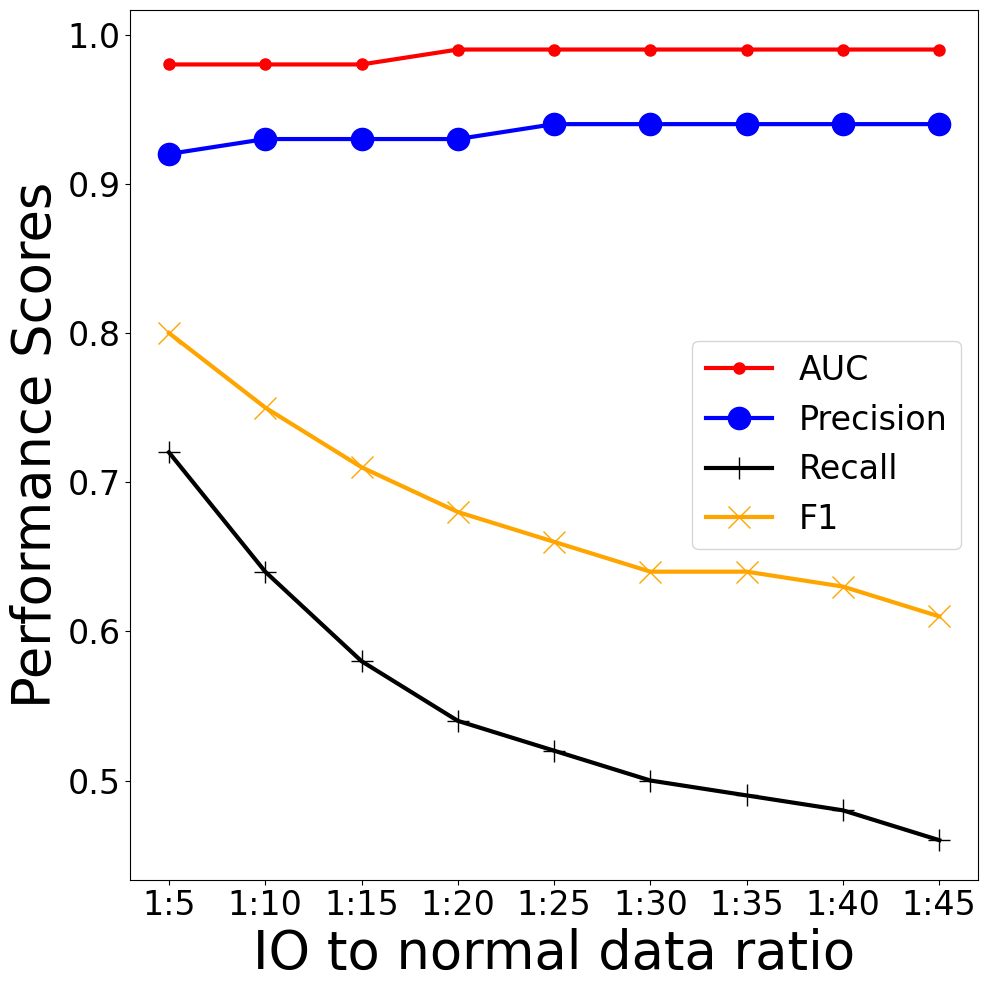

In [5]:
divisor = 5
df_count = df_results.loc[df_results['index']%divisor == 0]
df_count['label'] = df_count['index'].apply(lambda x: '1:'+ str(x))

parameters = {
        'data': df_count,
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 24,
        'complementary': True,
        'legend_font': 24,
        'columns': [
            {'column': 'mean_auc',
             'label': 'AUC',
            },{
            'column': 'mean_precision',
             'label': 'Precision'
            },
            {
                'column': 'mean_recall',
                'label': 'Recall',
            },
            {
                'column': 'mean_f1',
                'label': 'F1',
            },
            # {
            #     'column': 'auc_pr',
            #     'label': 'AUC-PR'
            # }
            
        ],
        'x': 'index',
        'x_ticks': 'label',
        'xlabel': 'IO to normal data ratio',
        'ylabel': 'Performance Scores',
        'legend_location': 'center right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './../plots',
            'filename': 'replier_model_diff_data_size.png'
        },
        'random_color': False
    }
    

line_plot(parameters)

In [ ]:
7